In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt

from prophet import Prophet
import datetime as dt

In [ ]:
!pip install yfinance

In [5]:
import yfinance as yfin
yfin.pdr_override()

In [6]:
end=dt.datetime.now()
start=end-dt.timedelta(days=5000)
start, end

(datetime.datetime(2008, 12, 15, 3, 36, 32, 586208),
 datetime.datetime(2022, 8, 24, 3, 36, 32, 586208))

In [7]:
stocklist=['GOOG','MSFT','META','AMZN','AAPL']

In [8]:
df = web.get_data_yahoo(stocklist, start, end)
print(df)

[*********************100%***********************]  5 of 5 completed
             Adj Close                                                  \
                  AAPL        AMZN        GOOG        META        MSFT   
Date                                                                     
2008-12-15    2.889307    2.442500    7.737747         NaN   14.275752   
2008-12-16    2.910042    2.631500    8.101633         NaN   15.078009   
2008-12-17    2.718845    2.659000    7.851570         NaN   14.740608   
2008-12-18    2.727078    2.604000    7.728033         NaN   14.470689   
2008-12-19    2.744460    2.578000    7.725294         NaN   14.335733   
...                ...         ...         ...         ...         ...   
2022-08-17  174.550003  142.100006  120.320000  174.850006  291.320007   
2022-08-18  174.149994  142.300003  120.860001  174.660004  290.170013   
2022-08-19  171.520004  138.229996  118.120003  167.960007  286.149994   
2022-08-22  167.570007  133.220001  115.070

In [9]:
close=df.Close

In [10]:
close.head()

,AAPL,AMZN,GOOG,META,MSFT
Date,,,,,
2008-12-15,3.383929,2.4425,7.737747,NaN,19.040001
2008-12-16,3.408214,2.6315,8.101633,NaN,20.110001
2008-12-17,3.184286,2.6590,7.851570,NaN,19.660000
2008-12-18,3.193929,2.6040,7.728033,NaN,19.299999
2008-12-19,3.214286,2.5780,7.725294,NaN,19.120001


In [11]:
close.tail()

,AAPL,AMZN,GOOG,META,MSFT
Date,,,,,
2022-08-17,174.550003,142.100006,120.320000,174.850006,291.320007
2022-08-18,174.149994,142.300003,120.860001,174.660004,290.170013
2022-08-19,171.520004,138.229996,118.120003,167.960007,286.149994
2022-08-22,167.570007,133.220001,115.070000,163.050003,277.750000
2022-08-23,167.229996,133.619995,114.769997,161.110001,276.440002


In [12]:
close[close.index>end-dt.timedelta(days=100)].describe(percentiles=[0.1,0.5,0.9])

,AAPL,AMZN,GOOG,META,MSFT
count,68.000000,68.000000,68.000000,68.000000,68.000000
mean,150.295589,120.398846,114.178331,173.762207,266.981323
std,12.371465,12.891716,4.427347,12.767880,13.121511
min,130.059998,102.309998,105.440002,155.850006,242.259995
10%,136.464999,107.011253,108.106650,159.999997,252.672000
50%,148.215004,116.240002,114.605000,169.675003,265.395004
90%,168.715005,141.190004,119.924551,193.823000,286.410992
max,174.550003,144.779999,122.879997,202.619995,293.470001


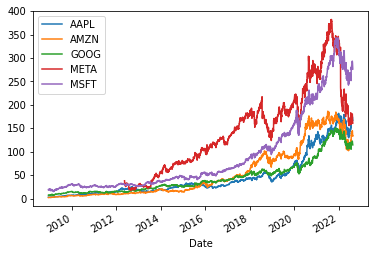

In [13]:
close.plot()

In [28]:
AAPL_trunc=close['AAPL'][:'2022-01-01']
AAPL_trunc

Date
2008-12-15      3.383929
2008-12-16      3.408214
2008-12-17      3.184286
2008-12-18      3.193929
2008-12-19      3.214286
                 ...    
2021-12-27    180.330002
2021-12-28    179.289993
2021-12-29    179.380005
2021-12-30    178.199997
2021-12-31    177.570007
Name: AAPL, Length: 3285, dtype: float64

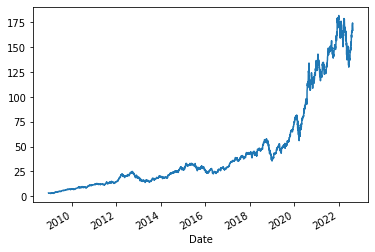

In [29]:
close['AAPL'].plot()

In [30]:
df2 = pd.DataFrame({'ds':AAPL_trunc.index, 'y': AAPL_trunc})
df2.reset_index(inplace=True)
del df2['Date']
df2.head()

,ds,y
0,2008-12-15,3.383929
1,2008-12-16,3.408214
2,2008-12-17,3.184286
3,2008-12-18,3.193929
4,2008-12-19,3.214286


In [31]:
m=Prophet()
m.fit(df2)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4d2rrty0/dvscc5ad.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4d2rrty0/wxmzz3tt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43000', 'data', 'file=/tmp/tmp4d2rrty0/dvscc5ad.json', 'init=/tmp/tmp4d2rrty0/wxmzz3tt.json', 'output', 'file=/tmp/tmp6rccgqlt/prophet_model-20220824035304.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:53:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:53:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [32]:
dt.datetime(2022,8,23)-dt.datetime(2022,1,1)

datetime.timedelta(days=234)

In [33]:
future=m.make_future_dataframe(periods=234)
future.tail()

,ds
3514,2022-08-18
3515,2022-08-19
3516,2022-08-20
3517,2022-08-21
3518,2022-08-22


In [34]:
future.head()

,ds
0,2008-12-15
1,2008-12-16
2,2008-12-17
3,2008-12-18
4,2008-12-19


In [35]:
forecast=m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3514,2022-08-18,195.598786,188.975797,202.102078
3515,2022-08-19,195.710670,189.136814,202.428222
3516,2022-08-20,196.186455,189.234826,202.553267
3517,2022-08-21,196.404512,189.794613,202.948095
3518,2022-08-22,196.441787,189.962892,202.989688


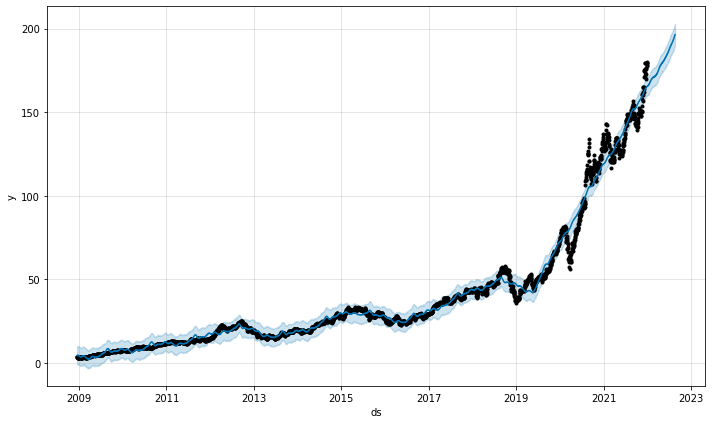

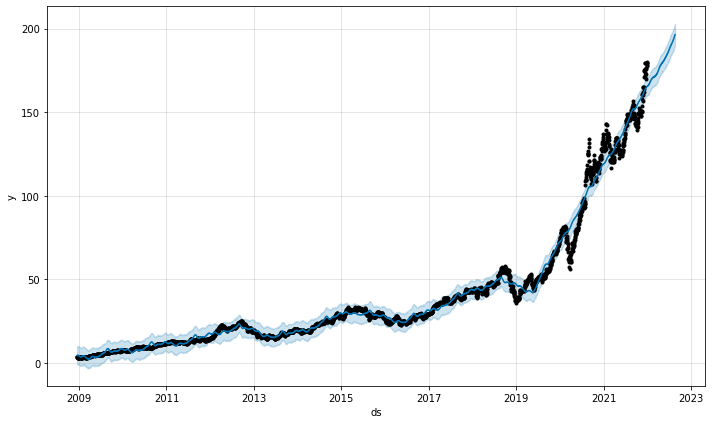

In [36]:
m.plot(forecast)

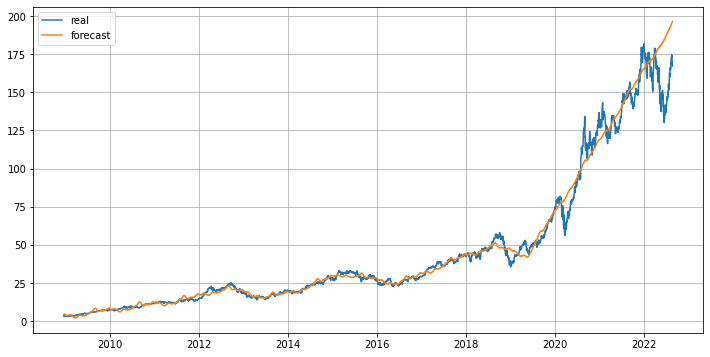

In [38]:
plt.figure(figsize=(12,6))
plt.plot(close['AAPL'],label='real')
plt.plot(forecast['ds'],forecast['yhat'],label='forecast')
plt.grid()
plt.legend()
plt.show()